In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

## Задание

Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по 1 месяцу.

Подберите параметры модели SARIMAX для этого ряда.

Сделайте вывод о том, как изменилась модель по сравнению с недельной.

In [2]:
#Path_Energy = 'PJME_hourly.csv'
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])
data = data.resample('m').mean()

In [3]:
data.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


In [4]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from random import random

### Берем лаг в 4 года

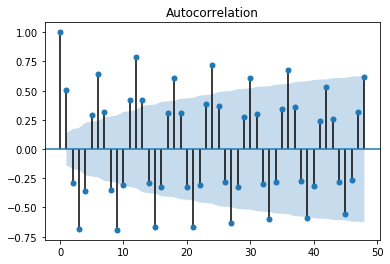

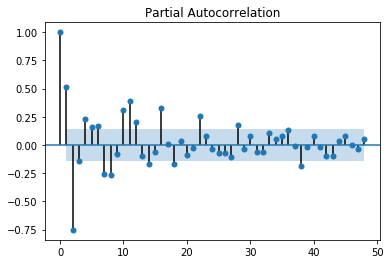

In [5]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
sm.graphics.tsa.plot_acf(data['PJME_MW'].values, lags=12*4)
plt.show()

#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(data['PJME_MW'].values, lags=12*4)
plt.show()

### Далее повторяем все рассуждения урока, но с поправкой на новый временной масштаб

In [6]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 6)
SARIMAX: (0, 0, 1) x (0, 0, 2, 6)
SARIMAX: (0, 0, 2) x (0, 1, 0, 6)
SARIMAX: (0, 0, 2) x (0, 1, 1, 6)


In [7]:
#для построения модели используем все данные, кроме 12 последних месяцев (это будет тестовый набор)
import warnings
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data['PJME_MW'].values[:-12],order=[0,0,1],
                                seasonal_order=[1,1,2,6] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print('AIC:{}',results.aic)

AIC:{} 2973.9212281887135


In [9]:
%%time
warnings.filterwarnings("ignore") # отключает предупреждения
res_aic = 100000
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data['PJME_MW'].values[:-12],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            
            if param_seasonal == (0, 0, 0, 6):
                print(f'ARIMA{param}------------------')
            if res_aic >= results.aic:
                res_aic = results.aic
                print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, res_aic))
            
                
        except:
            continue

ARIMA(0, 0, 0)------------------
ARIMA(0, 0, 0)x(0, 0, 0, 6)3 - AIC:4416.269672223332
ARIMA(0, 0, 0)x(0, 0, 1, 6)3 - AIC:4156.4273245958375
ARIMA(0, 0, 0)x(0, 0, 2, 6)3 - AIC:3987.7302382236703
ARIMA(0, 0, 0)x(0, 1, 0, 6)3 - AIC:3398.419994288184
ARIMA(0, 0, 0)x(0, 1, 1, 6)3 - AIC:3208.7743033366
ARIMA(0, 0, 0)x(0, 1, 2, 6)3 - AIC:3048.933911813644
ARIMA(0, 0, 0)x(1, 1, 2, 6)3 - AIC:3021.7214259236707
ARIMA(0, 0, 0)x(1, 2, 2, 6)3 - AIC:3009.220879570287
ARIMA(0, 0, 1)------------------
ARIMA(0, 0, 1)x(0, 1, 2, 6)3 - AIC:2980.2487211471566
ARIMA(0, 0, 1)x(0, 2, 2, 6)3 - AIC:2980.2403035345037
ARIMA(0, 0, 1)x(1, 1, 2, 6)3 - AIC:2973.9212281887135
ARIMA(0, 0, 1)x(1, 2, 2, 6)3 - AIC:2957.2691864565513
ARIMA(0, 0, 1)x(2, 2, 2, 6)3 - AIC:2931.0288589245265
ARIMA(0, 0, 2)------------------
ARIMA(0, 0, 2)x(2, 2, 2, 6)3 - AIC:2913.725154036837
ARIMA(0, 1, 0)------------------
ARIMA(0, 1, 1)------------------
ARIMA(0, 1, 2)------------------
ARIMA(0, 1, 2)x(0, 2, 2, 6)3 - AIC:2906.5015878065524


In [10]:
mod = sm.tsa.statespace.SARIMAX(data['PJME_MW'].values[:-12],order=[1,1,2],
                                seasonal_order=[1,2,2,6] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 2874.555443944072


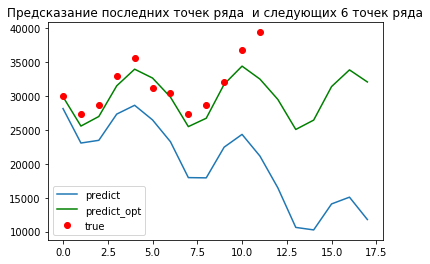

In [15]:
pred_dynamic = results.forecast(18)    
pred_dynamic_opt = results_opt.forecast(18)

plt.plot(pred_dynamic, label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data['PJME_MW'].values[-12:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 6 точек ряда')
plt.legend()

plt.show()

In [16]:
from sklearn.metrics import r2_score 
adf_test = sm.tsa.stattools.adfuller(results_opt.resid)
print(adf_test)

(-7.427897497798674, 6.475536455211759e-11, 6, 181, {'1%': -3.467004502498507, '5%': -2.8776444997243558, '10%': -2.575355189707274}, 3085.102391778983)


In [17]:
adf_test = sm.tsa.stattools.adfuller(results.resid)
print(adf_test)

(-5.229056489799294, 7.667322357517337e-06, 14, 173, {'1%': -3.4687256239864017, '5%': -2.8783961376954363, '10%': -2.57575634100705}, 3159.001573638787)


## Вывод: 
### тест Дики Фуллера показывает стационарность остатков ряда. Визуально смущает неучтенный моделью выброс на последних 2-х точках. Критерий AIC вроде лучше, чем на недельном датасете, но без четкого понимания его математики при масштабировании не рискну делать выводы... Вообще вся схема напоминает шаманство без теоретической (математической) подготовки.

### И вот какой все время мучает вопрос: если у нас параметр d>0, то это же означает, например, для (p,d,q)=(0,1,1) процесс, эквивалентный случайному блужданию? Как такой процесс может что-то прогнозировать? Или переформулирую - насколько корректно восстановление процесса из разностей, если разность - случайный шум? Какова конструкция этого восстановления, почему она приводит к исходному экземпляру, а не к какому-то другому из наиболее вероятных реализаций? Грубо говоря, если пьяного высадили в поле и он вместо маленького шага влево сначала делает шаг вправо, то весь маршрут пойдет иначе...

